# Importing Libraries and Data

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [2]:
# Importing Data
Path = r'D:\Data_Analysis\05-12-2025_Bike_Dashboard\02.Data'
df_bikes = pd.read_pickle(os.path.join(Path, 'Prepared Data', 'Bike_Trips_Clean.pkl'))
df_bikes.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,daily_rides,trip_duration
0,115C78C3039FFA89,electric_bike,2022-01-01 09:21:14,2022-01-01 09:35:46,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-01,11.6,592,872.0
1,7FFD810CAA7A919E,classic_bike,2022-01-01 02:43:56,2022-01-01 02:43:57,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-01,11.6,592,1.0
2,E715E8432031B72C,classic_bike,2022-01-01 02:13:33,2022-01-01 02:18:42,Essex Light Rail,JC038,Washington St,JC098,40.712774,-74.036486,40.724294,-74.035483,member,2022-01-01,11.6,592,309.0
3,BF1B7B1E1961A87B,electric_bike,2022-01-01 17:18:46,2022-01-01 18:55:25,Grand St,JC102,W 27 St & 7 Ave,6247.06,40.715178,-74.037683,40.746647,-73.993915,casual,2022-01-01,11.6,592,5799.0
4,4A01F0E53C6F4386,electric_bike,2022-01-01 11:23:32,2022-01-01 11:29:27,Christ Hospital,JC034,Hoboken Terminal - Hudson St & Hudson Pl,HB101,40.734786,-74.050444,40.735938,-74.030305,member,2022-01-01,11.6,592,355.0


# Preparing Data and General Seaborn Theme

In [3]:
# Renaming columns for easier function labeling
df_bikes.rename(columns={'start_station_name': 'start_station', 'end_station_name': 'end_station',
                'member_casual': 'user_type', 'avgTemp': 'average_temperature'}, inplace=True)
df_bikes.head()

,ride_id,rideable_type,started_at,ended_at,start_station,start_station_id,end_station,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,date,average_temperature,daily_rides,trip_duration
0,115C78C3039FFA89,electric_bike,2022-01-01 09:21:14,2022-01-01 09:35:46,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-01,11.6,592,872.0
1,7FFD810CAA7A919E,classic_bike,2022-01-01 02:43:56,2022-01-01 02:43:57,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-01,11.6,592,1.0
2,E715E8432031B72C,classic_bike,2022-01-01 02:13:33,2022-01-01 02:18:42,Essex Light Rail,JC038,Washington St,JC098,40.712774,-74.036486,40.724294,-74.035483,member,2022-01-01,11.6,592,309.0
3,BF1B7B1E1961A87B,electric_bike,2022-01-01 17:18:46,2022-01-01 18:55:25,Grand St,JC102,W 27 St & 7 Ave,6247.06,40.715178,-74.037683,40.746647,-73.993915,casual,2022-01-01,11.6,592,5799.0
4,4A01F0E53C6F4386,electric_bike,2022-01-01 11:23:32,2022-01-01 11:29:27,Christ Hospital,JC034,Hoboken Terminal - Hudson St & Hudson Pl,HB101,40.734786,-74.050444,40.735938,-74.030305,member,2022-01-01,11.6,592,355.0


In [4]:
# Defining a theme and figure size for all plots
sns.set_theme(style='ticks', palette='dark', context='paper')
sessionPalette = 'dark'
figSize = (12, 8)

# Visualizations

In [5]:
# Creating top 20 station frequency bar plot function
def top_stations(df_name, column_name_with_quotes, number, **kwargs):
    station_counts = df_name[column_name_with_quotes].value_counts().head(number)

    # Defining conditional expression to choose colors according to number of categories
    total_colors = sns.color_palette()
    if len(total_colors) < number:
        Palette = 'tab20'
        print(f'Using Tab20 palette for ({len(total_colors)} colors)')
    else:
        palette = sessionPalette

    # Creating bar plot
    fig, ax = plt.subplots(figsize=figSize)
    sns.barplot(y=station_counts.index, x=station_counts.values, palette=palette,
                alpha=0.6, hue=station_counts.index, legend=False)
    ax.set_title(f'Top {number} Stations', fontsize=15, fontweight='bold')
    ax.set_xlabel('number_of_trips', fontsize=12)
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.set_ylabel(f'{column_name_with_quotes}_name', fontsize=12)

    # Adding bar labels
    for i, v in enumerate(station_counts.values):
        ax.text(v + 10, i, f'{v:,.0f}', va='center', fontsize=10)

    plt.tight_layout()
    plt.show()

    # Calculating trip percentage of total 20 station trips captured by the top 5 stations.
    Top5_proportion = (df_name[column_name_with_quotes].value_counts().head(5).sum()) / \
        (df_name[column_name_with_quotes].value_counts().head(number).sum())
    print(f'\033[1mThe Top 5 stations account for {Top5_proportion:.2%} of the top 20 station trips.\033[0m')

## Station Bar Plots

Using Tab20 palette for (10 colors)


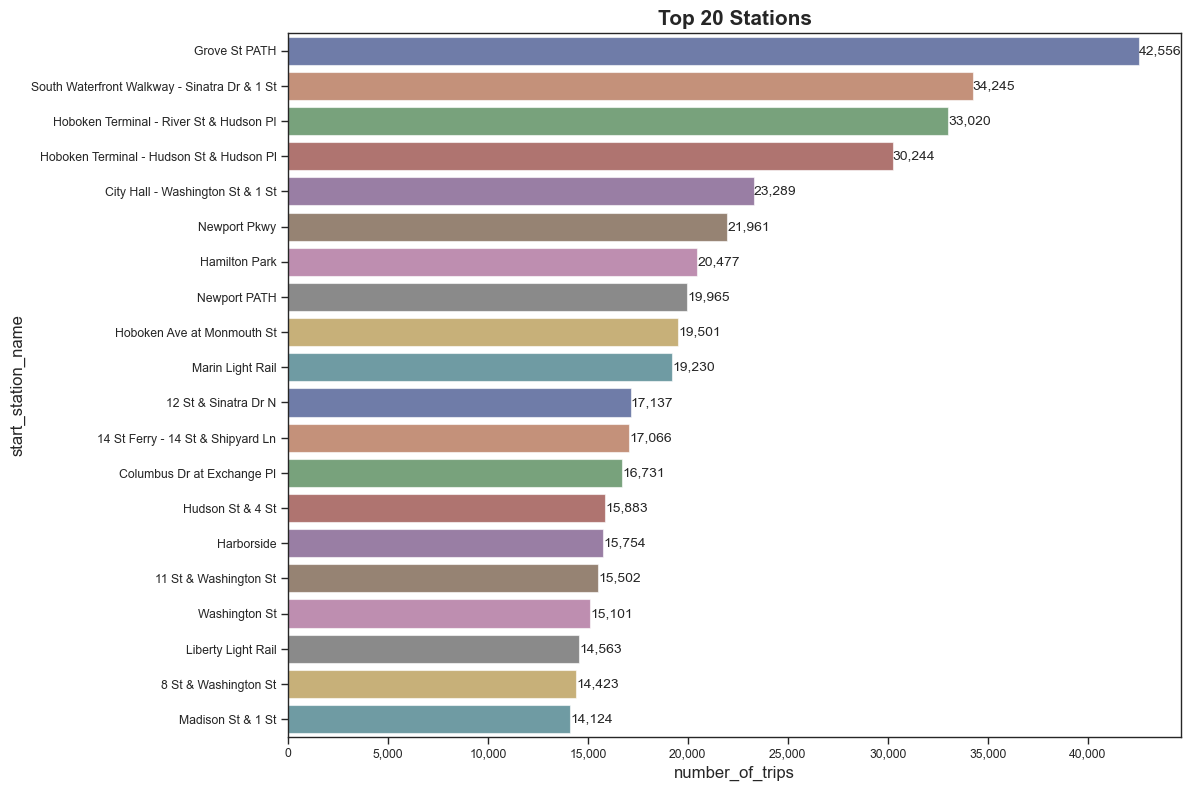

The Top 5 stations account for 38.82% of the top 20 station trips.


In [6]:
top_stations(df_bikes, 'start_station', 20)

Using Tab20 palette for (10 colors)


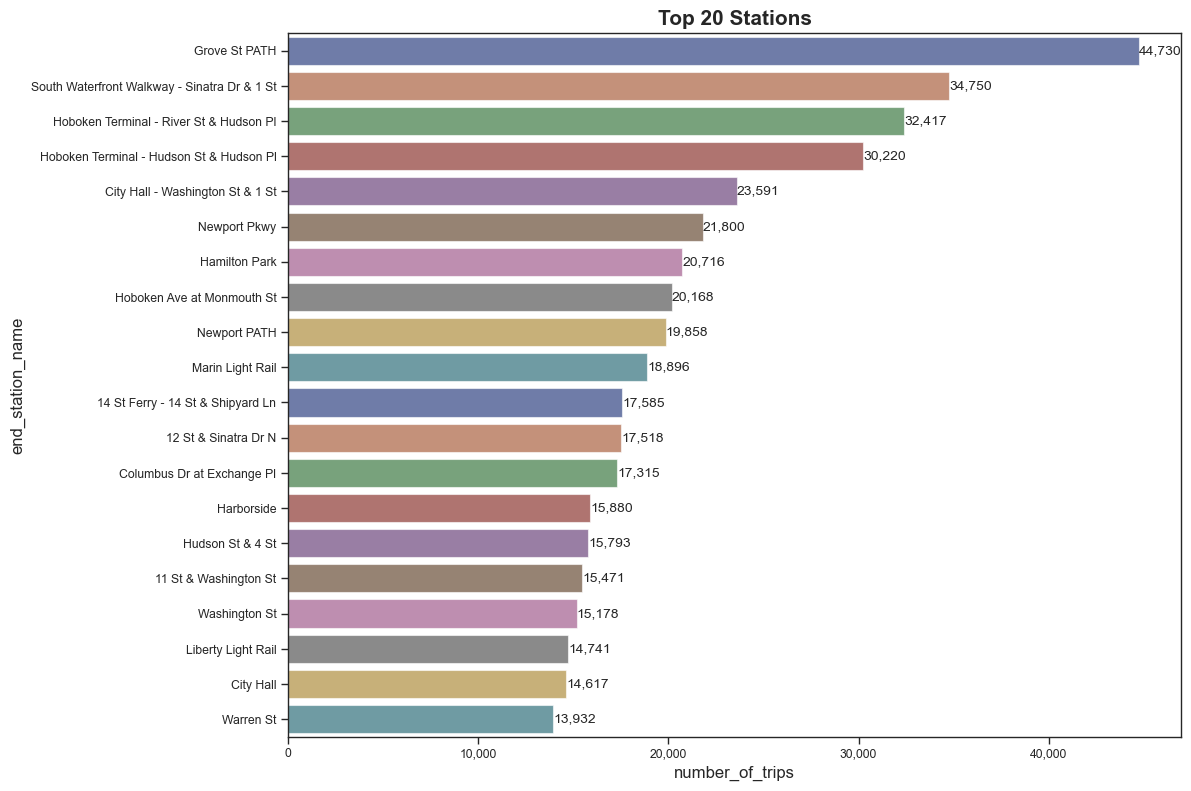

The Top 5 stations account for 38.97% of the top 20 station trips.


In [7]:
top_stations(df_bikes, 'end_station', 20)

Used a conditional expression to change palette to tab20 based on the amount of colors needed and to ensure that each bar plot has similar colors to the ones used in other visualizations. The Grove St, South Waterfront Walkway, Hoboken Terminal and City Hall account for almost about 39% of the total start and end stations trips. It may be best to view these on a map to understand better the business implications.

## Dual Axis Line Plot

In [8]:
# Creating dual axis line plot function for numeric columns
def dual_axis(df_name, x_axis_with_quotes, y1_axis_with_quotes, y2_axis_with_quotes, **kwargs):

    fig, ax1 = plt.subplots(figsize=figSize)

    # Plotting daily bike rides
    sns.lineplot(data=df_name, x=x_axis_with_quotes, y=y1_axis_with_quotes, color='navy',
                 alpha=0.7, ax=ax1, label=y1_axis_with_quotes)
    ax1.tick_params(axis='y', labelcolor='navy')
    ax1.set_xlabel(None)
    ax1.set_ylabel(f'{y1_axis_with_quotes}', color='navy', fontsize=12)
    ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    plt.grid(axis='y', linestyle='-', linewidth=0.5)

    # Creating dual axis and temperatures line plot
    ax2 = ax1.twinx()
    sns.lineplot(data=df_name, x=x_axis_with_quotes, y=y2_axis_with_quotes, color='violet',
                 ax=ax2, label=y2_axis_with_quotes)
    ax2.set_ylabel(f'{y2_axis_with_quotes}', color='violet', fontsize=12)
    ax2.tick_params(axis='y', labelcolor='violet')
    plt.grid(linestyle='--', linewidth=0.5)

    # Combining Legends to appear on upper right
    marker1, label1 = ax1.get_legend_handles_labels()
    marker2, label2 = ax2.get_legend_handles_labels()
    ax1.legend(marker1 + marker2, label1 + label2, loc='upper right')
    ax2.legend().remove()  # Removing the ax2 legend

    plt.title(f'CitiBike_{y1_axis_with_quotes} and {y2_axis_with_quotes} (2022)', fontsize=16)
    plt.tight_layout()
    plt.show()

    # Calculating Pearson's correlation coefficient
    correlation = df_name[y1_axis_with_quotes].corr(df_name[y2_axis_with_quotes])
    print(f'\033[1mCorrelation between {y1_axis_with_quotes} and {y2_axis_with_quotes}: {correlation:.3f}\033[0m')

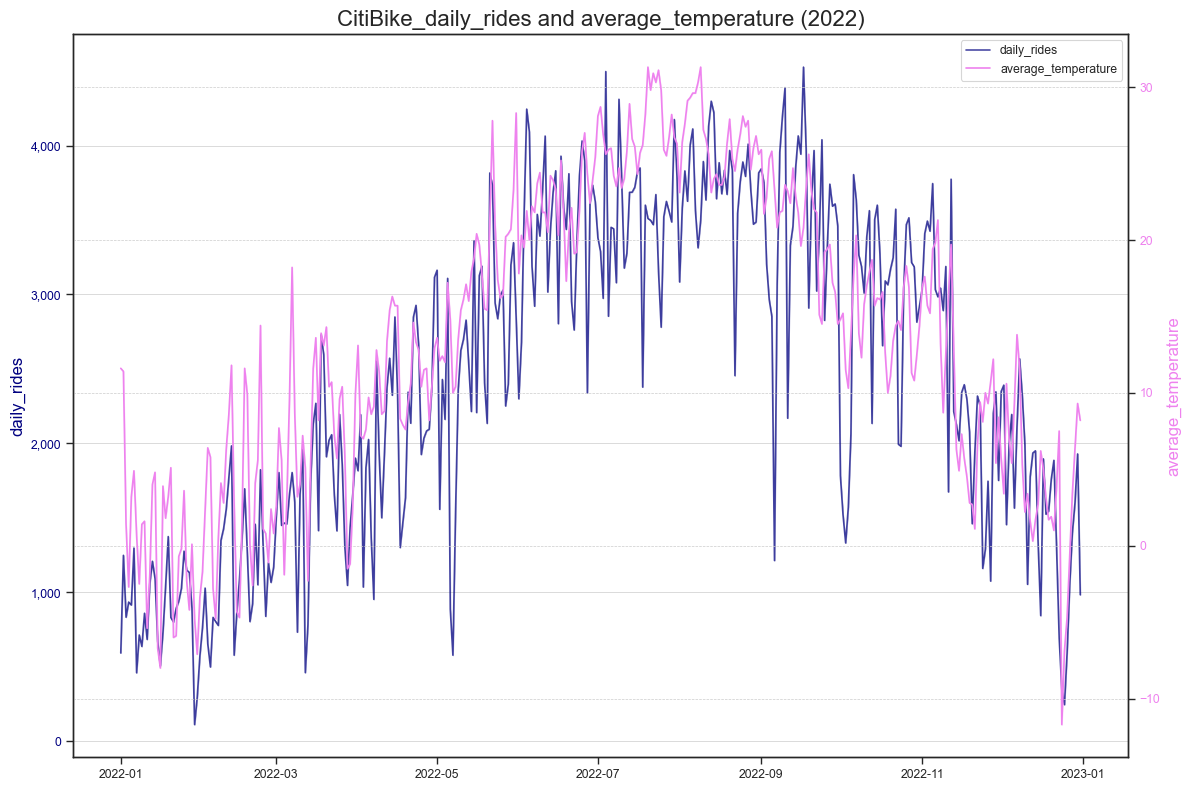

Correlation between daily_rides and average_temperature: 0.814


In [9]:
dual_axis(df_bikes, 'date', 'daily_rides', 'average_temperature')

## Average Temperature per User Trip Box Plots

<Figure size 1200x800 with 0 Axes>

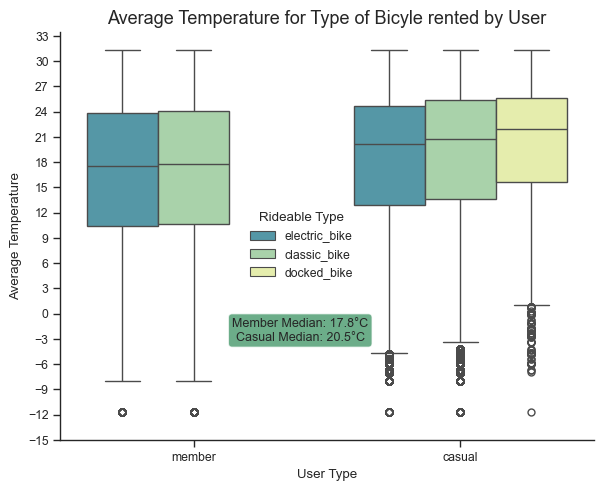

In [10]:
# Creating box plot
with sns.color_palette('Spectral_r'):
    plt.figure(figsize=figSize)
    g = sns.catplot(data=df_bikes, kind='box', x='user_type', y='average_temperature', hue='rideable_type')
    g.ax.set_title('Average Temperature for Type of Bicyle rented by User', fontsize=13)
    g.set(xlabel='User Type',
          ylabel='Average Temperature',
          yticks=range(-15, 36, 3))
    g.legend.set_title('Rideable Type')
    g.legend.set_loc('center')

# Calculating median values for easier interpretation
ax = g.ax
member_median = df_bikes[df_bikes['user_type'] == 'member']['average_temperature'].median()
casual_median = df_bikes[df_bikes['user_type'] == 'casual']['average_temperature'].median()

# Calculating an overall median temperatures for member and casual users
ax.text(0.45, 0.3, f'Member Median: {member_median:.1f}°C\nCasual Median: {casual_median:.1f}°C',
        transform=ax.transAxes, fontsize=9, ha='center', va='top',
        bbox=dict(boxstyle='round', facecolor='seagreen', alpha=0.7))

plt.tight_layout()
plt.show()

The box plot reveals members tend to rent bikes during lower temperatures with a median of 17.8°C. Casual users, on the other end, show a higher concentrated distribution between 13°C to 25°C and a 20.5°C rental median, indicating a preference for warm temperatures whenever renting electric or classic bicycles, but show more outliers in rentals on low temperature days. The interquartile range suggests membership users have greater variability in their rental behavior when compared to casual users during warm weather days.

## Trip Duration versus Temperature Scatter Plots

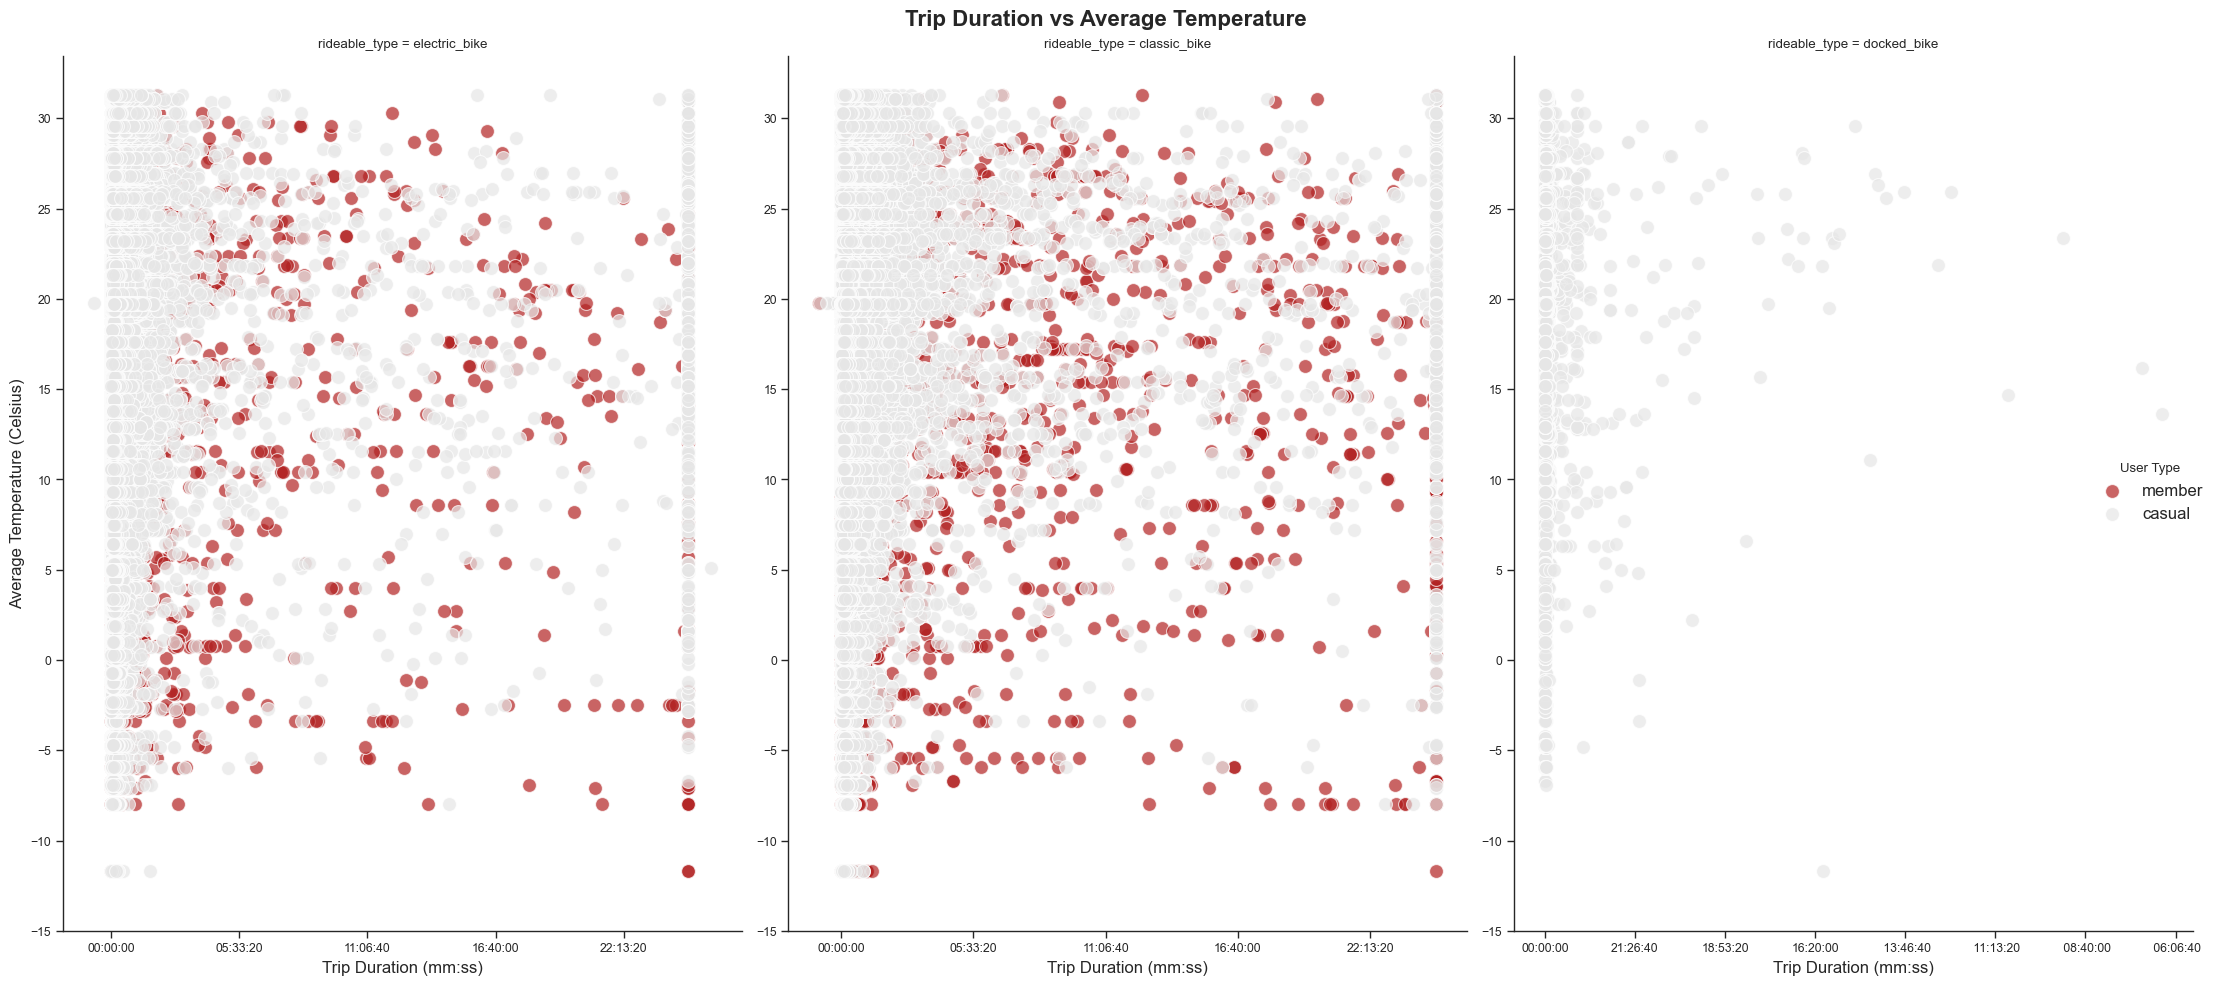

Correlation between Trip Duration and Average Temperature: 0.013
Total trips below 1 hour sum-up to 889,919, between 3 - 24 hours sum up to 3,478, and over 24 hours sum up to 2,078.


In [11]:
# Using FacetGrid with Scatter Plot Function
Palettes = dict(member='firebrick', casual='.9')
grid = sns.FacetGrid(df_bikes, hue='user_type', col='rideable_type',
                     palette=Palettes, sharex=False, sharey=False, margin_titles=True, height=10, aspect=.7)
grid.map(sns.scatterplot, 'trip_duration', 'average_temperature', s=100, alpha=0.7)

# Modifying y and x-ticks
grid.set(yticks=range(-15, 35, 5))
grid.set_axis_labels('Trip Duration (mm:ss)', 'Average Temperature (Celsius)', fontsize=12)
grid.add_legend(title='User Type', fontsize=12)

# Converting x-axis scientific notation to mm:ss time format
for ax in grid.axes.flat:
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: str(pd.to_timedelta(x, unit='s'))[7:]))

grid.fig.suptitle('Trip Duration vs Average Temperature', fontsize=16, fontweight='bold')
grid.fig.tight_layout()
plt.show()

# Calculating Pearson's correlation coefficient
Pcorr = df_bikes['trip_duration'].corr(df_bikes['average_temperature'])
print(f'\033[1mCorrelation between Trip Duration and Average Temperature: {Pcorr:.3f}\033[0m')

# Calculating number of trips exceeding 24 hours.
Below1hr = df_bikes[df_bikes['trip_duration'] < 10800].shape[0]
From3to24hrs = df_bikes.loc[df_bikes['trip_duration'].between(10800, 86400)].shape[0]
Over24hrs = df_bikes[df_bikes['trip_duration'] > 86400].shape[0]
print(f'\033[1mTotal trips below 1 hour sum-up to {
      Below1hr:,}, between 3 - 24 hours sum up to {From3to24hrs:,}, and over 24 hours sum up to {Over24hrs:,}.\033[0m')

The above scatterplot reveals most of the trips take less than 3 hours. However, there also exists many extremely long rentals that will require further investigation since 3,478 trips exceed the 3 hours recreational or primary transport length of use that membership benefits could provide. These data points could reveal existing logistic issues. CitiBikes Day Pass is likely causing the high concentration of points over the 24 hour trip duration that sum up to 2,078 trips. Considering that CitiBikes policy specifies that any continuous use over 30 minutes will incur additional fees, it is likely that technical issues or other factors are contributing to the spatial distribution of those points.